In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Indians_Diabetes_Dataset_Week 1.csv")

In [4]:
df.head()

,Pregnancies,Glucose Level,Blood Pressure Level,Skin Thickness,Insulin Level,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose Level               768 non-null    int64  
 2   Blood Pressure Level        768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin Level               768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [7]:
df["Outcome"].unique()

array([1, 0])

In [56]:
df.describe()

,Pregnancies,Glucose Level,Blood Pressure Level,Skin Thickness,Insulin Level,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# pairplot for analyzing the dataset

sns.pairplot(df.iloc[:,:-1])

ax = plt.gca()
ax.set_xlabel(ax.get_xlabel(),weight="bold")
ax.set_ylabel(ax.get_ylabel(), weight="bold")

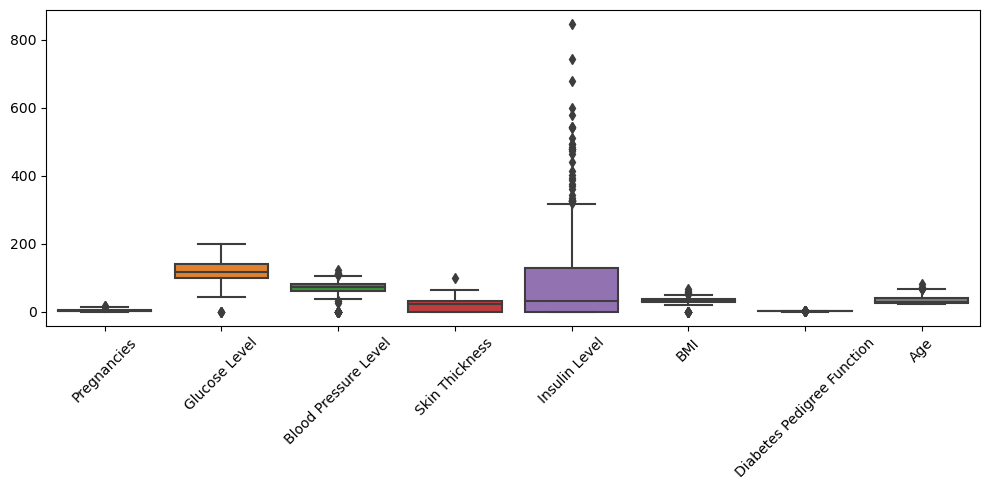

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(df.iloc[:,:-1])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

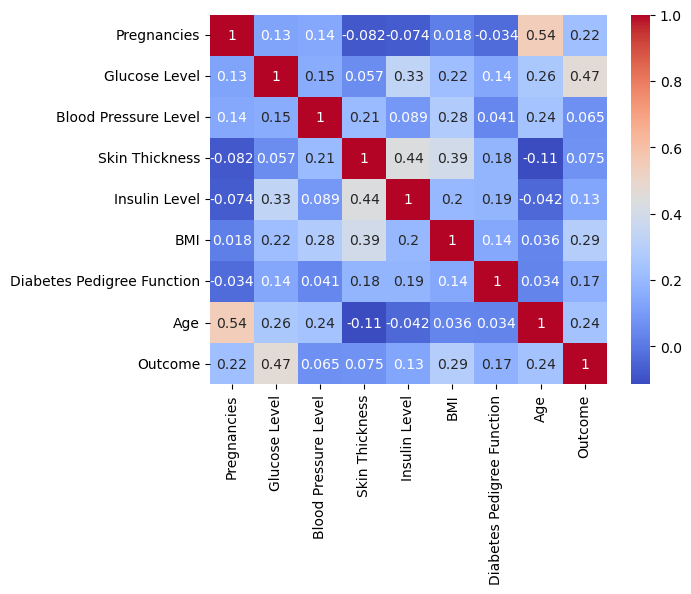

In [37]:
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="coolwarm")

In [11]:
# Identify if the dataset is balanced or not

print(f"Count for (Outcome: 0): {df['Outcome'][df['Outcome'] == 0].count()}")
print(f"Count for (Outcome: 1): {df['Outcome'][df['Outcome'] == 1].count()}")


Count for (Outcome: 0): 500
Count for (Outcome: 1): 268


In [3]:
# SMOTE balancing technique for oversampling

from imblearn.over_sampling import SMOTE

X = df.iloc[:, :-1]
y = df.iloc[:, -1] 


smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [4]:
print(f"Resampled_Count for (Outcome: 0): {(y_resampled == 0).sum()}")
print(f"Resampled_Count for (Outcome: 1): {(y_resampled == 1).sum()}")

Resampled_Count for (Outcome: 0): 500
Resampled_Count for (Outcome: 1): 500


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [6]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_resampled)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_resampled, test_size=0.2, random_state=42)

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [9]:
print(f"Accuracy Score (Decision Tree): {accuracy_score(y_test, y_pred)}")

Accuracy Score (Decision Tree): 0.755


### Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
         base_estimator=DecisionTreeClassifier(),
         n_estimators=100,
         max_samples=0.3,
         bootstrap=True,
         random_state=42
         )


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
bag.fit(X_train, y_train)

In [ ]:

bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(
        ccp_alpha = 0.0,
        class_weight = None,
        criterion = 'gini',
        max_depth = None,
        max_features = None,
        max_leaf_nodes = None,
        min_impurity_decrease = 0.0,
        min_samples_leaf = 3,
        min_weight_fraction_leaf = 0.0,
        random_state = None,
        splitter = 'best'
    ),
    bootstrap = True,
    bootstrap_features = True,
    max_features = 8,
    max_samples = 0.25,
    n_estimators = 100,
    n_jobs = None,
    oob_score = True,
    random_state = 42,
    verbose = 0,
    warm_start = False
)


In [ ]:
# Assuming you have X_train and y_train as your training data
bag.fit(X_train, y_train)

# Now that the classifier is fitted, you can make predictions
y_pred = bag.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'base_estimator' : [RandomForestClassifier()],
    'n_estimators' : [50,100,300],
    'max_samples' : [0.1,0.4,0.6,0.8,1],
    'bootstrap' : [True, False],
    'max_features' : [0.1,0.25,0.4,0.7,1]
}

In [ ]:
search = GridSearchCV(BaggingClassifier(),parameters, cv =5)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
best_params = search.best_params_
best_score = search.best_score_
best_estimator = search.best_estimator_

In [ ]:
print('best_params: ', best_params)
print('best_score: ', best_score)
print('best_estimator: ', best_estimator)
